In [25]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [37]:
dataset_dir = r'D:\B190358508\DL\DL LP-4\Datasets\caltech-101-img\caltech-101-img'

dataset_datagen = ImageDataGenerator(rescale=1.0 / 255,)

dataset_generator = dataset_datagen.flow_from_directory(
 dataset_dir,
 target_size=(64, 64),
 batch_size=2000,
 class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [38]:
x_train, y_train = dataset_generator[0]
x_test, y_test = dataset_generator[1]
print(len(x_train))
print(len(x_test))

2000
2000


In [28]:
weights_path = 'imagenet'

base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))


In [29]:
for layer in base_model.layers:
 layer.trainable = False

In [30]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.1107 - loss: 4.3048 - val_accuracy: 0.3005 - val_loss: 3.4060
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.3378 - loss: 3.1250 - val_accuracy: 0.3995 - val_loss: 2.9216
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 857ms/step - accuracy: 0.4383 - loss: 2.6369 - val_accuracy: 0.4435 - val_loss: 2.6111
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 771ms/step - accuracy: 0.5291 - loss: 2.1928 - val_accuracy: 0.4740 - val_loss: 2.4177
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 812ms/step - accuracy: 0.5936 - loss: 1.8775 - val_accuracy: 0.4930 - val_loss: 2.2429
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 773ms/step - accuracy: 0.6665 - loss: 1.6250 - val_accuracy: 0.5090 - val_loss: 2.1315
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 849ms/step - accuracy: 0.6958 - loss: 1.4299 - val_accuracy: 0.5325 - val_loss: 2.0517
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 836ms/step - accuracy: 0.7360 - loss: 1.2511 - val_accuracy: 

In [32]:
base_model = VGG16(weights=weights_path, include_top=False,input_shape=(64, 64, 3))
for layer in base_model.layers:
 layer.trainable = False
for layer in base_model.layers[len(base_model.layers) - 2:]:
 layer.trainable = True
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=64, epochs=10,validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 840ms/step - accuracy: 0.2450 - loss: 3.7516 - val_accuracy: 0.4645 - val_loss: 2.3964
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 827ms/step - accuracy: 0.5496 - loss: 1.9470 - val_accuracy: 0.5520 - val_loss: 1.9619
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 860ms/step - accuracy: 0.7001 - loss: 1.2473 - val_accuracy: 0.5710 - val_loss: 1.8405
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 825ms/step - accuracy: 0.7927 - loss: 0.8033 - val_accuracy: 0.5970 - val_loss: 1.6952
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 839ms/step - accuracy: 0.8462 - loss: 0.5611 - val_accuracy: 0.6120 - val_loss: 1.7363
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 896ms/step - accuracy: 0.9186 - loss: 0.3199 - val_accuracy: 0.6185 - val_loss: 1.7542
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 877ms/step - accuracy: 0.9445 - loss: 0.2117 - val_accuracy: 0.6170 - val_loss: 1.7469
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 864ms/step - accuracy: 0.9700 - loss: 0.1163 - val_accu

In [33]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 189ms/step


Preditcted:  Faces
Actual:  Faces


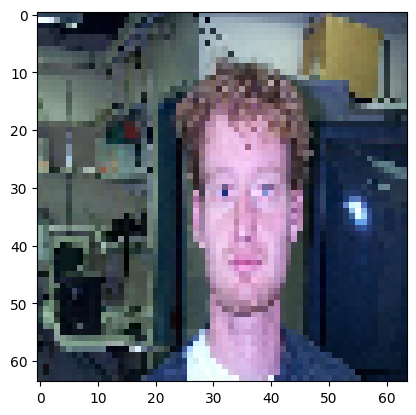

In [34]:
labels = list(dataset_generator.class_indices.keys())
n = 1999
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])